In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook')

# 1. Khám phá dữ liệu

In [31]:
df = pd.read_csv('Data/bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1. Dữ liệu có bao nhiêu dòng vào cột

In [32]:
print(f'Dữ liệu có {df.shape[0]} dòng')
print(f'Dữ liệu có {df.shape[1]} cột')

Dữ liệu có 41188 dòng
Dữ liệu có 21 cột


## 2. Dữ liệu có trùng lặp không ?

In [33]:
num_dup = df.shape[0] - df.drop_duplicates().shape[0]
print(f'Dữ liệu bị trùng {num_dup} dòng')

Dữ liệu bị trùng 12 dòng


In [37]:
df = df.drop_duplicates()

## 3. Kiểu dữ liệu có gì bất thường không ?

In [35]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**<font size ='3'> Kiểu dữ liệu không có gì bất thường.</font>**

## 4. Dữ liệu có bị thiếu không ?

In [38]:
(df == 'unknown').sum(axis = 0)

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

**<font size ='3'> Xóa những dòng bị thiếu ở trên</font>**

In [39]:
df = df[(df != 'unknown').all(axis = 1)].reset_index().drop(columns = 'index')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 5. Khám phá dữ liệu numeric

In [70]:
num_df = df.select_dtypes(['float64', 'int64'])
num_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,39.029694,259.513124,2.521721,956.318295,0.194337,-0.071425,93.523376,-40.602579,3.459976,5160.813967
std,10.332746,261.746393,2.720495,201.404843,0.522862,1.610306,0.585366,4.788790,1.777215,75.158267
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


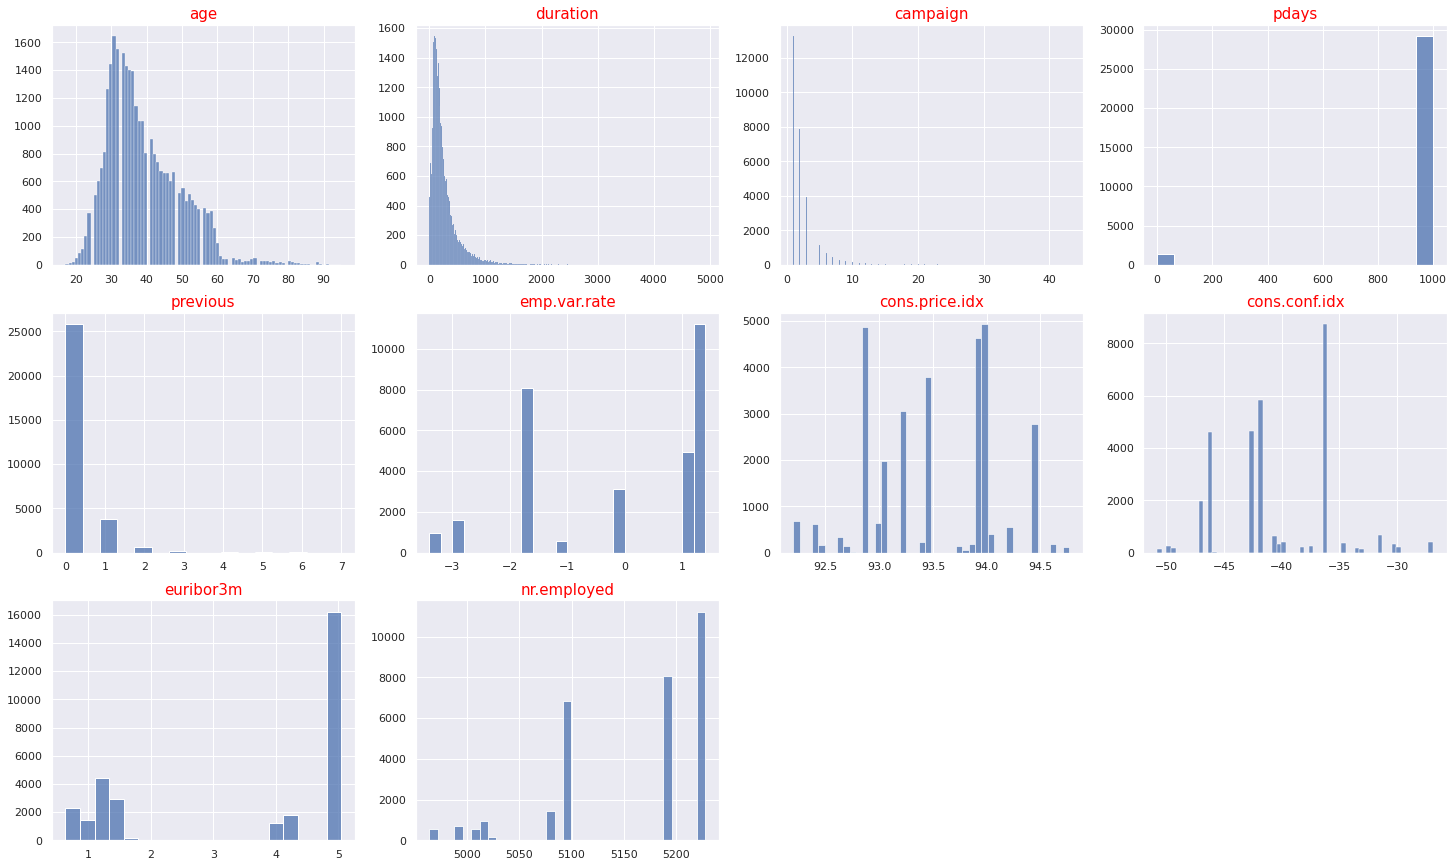

In [84]:
fig, axs = plt.subplots(3,4,figsize = (25,15))
for idx in range(num_df.shape[1]):
    r, c = idx // 4, idx % 4
    sns.histplot( data = num_df.iloc[:,idx], ax = axs[r,c])
    
    axs[r,c].set_title(f'{num_df.columns[idx]}', fontsize = 15, color = 'red')
    axs[r,c].xaxis.label.set_visible(False)
    axs[r,c].yaxis.label.set_visible(False)
    
axs[2,2].set_visible(False)
axs[2,3].set_visible(False)